In [ ]:
using Plots
using DifferentialEquations

# Isle Royale

- Odizolowana wyspa,
- żyją na niej tylko dwie populacje dużych ssaków, wilki i łosie,
- brak czynników zewnętrznych, całość jest pod ochroną jako "Park Narodowy Isle Royale",
- niemożliwość występowania migracji,
- wyspa stanowi zainteresowanie naukowców, przez co istnieje wiele spisów i badań nad żyjącymi na niej populacjami.

## Równanie Lotki-Volterry przypomnienie

W poprzedniej prezentacji używaliśmy modelu Lotki-Volterry by otrzymać zależność drapieżnik-ofiara. <br>
Prezentuje się on następująco (Dla uproszczenia zapisu $x(t) = x$ i $y(t) = y$) <br> <br>
$$\frac{dx}{dt} = (a - by)x,$$\
$$\frac{dy}{dt} = (cx - d)y,$$
gdzie <br> 
$a$ to częstość narodzin ofiar, <br>
$b$ to częstość umierania ofiar na skutek drapieżnictwa, <br>
$c$ to częśtość narodzin drapieżników, <br>
$d$ to częstość umierania drapieżników.

In [ ]:
function choose_lv(params)     #Funkcja zwracająca funkcje, dla uproszczenia podawnia parametrów a, b, c i d.
    return function LotVol!(du, u, p, t)     #
        du[1] = u[1]*(params[1] - params[2]*u[2])
        du[2] = u[2]*(params[3]*u[1] - params[4])
    end
end

choose_lv (generic function with 1 method)

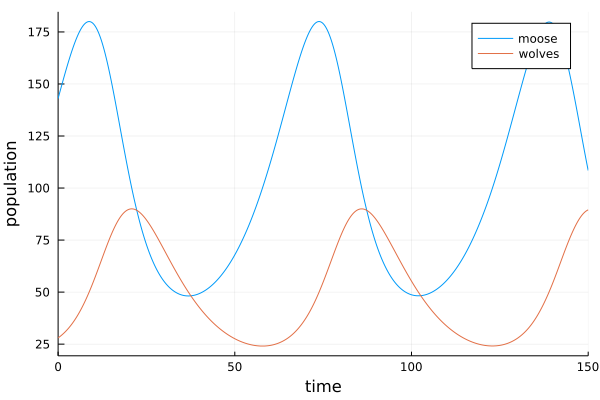

In [ ]:
params = (0.1, 0.002, 0.001, 0.1)    #Przykładowe parametry symulacji (na razie dowolne mające sens)

function lv(moose, wolves, t, params)
u0 = [moose; wolves]    #Warunki początkowe
tspan = (0, t)     #Przedział czasu (na razie dowolny)
prob = ODEProblem(choose_lv(params), u0, tspan)     #Przypisanie układu do zmiennej
sol = solve(prob)     #Rowzwiązanie układu
end
plot(lv(143, 28, 150, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

Poniżej na wykresie przestrzeni fazowej mieści się trajektoria dla naszych warunków początkowych. Widać, że układ równań jest stabilny (centrum).

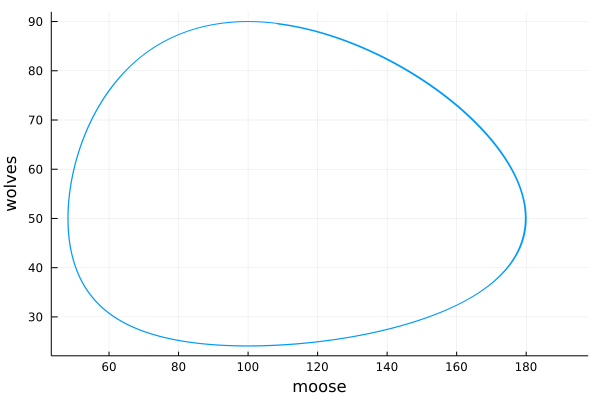

In [ ]:
plot(lv(143, 28, 150, params),
    xlabel = "moose",
    ylabel = "wolves",
    legend = :none,
    vars = (1,2))

## Weryfikacja wpływu środowiska

W poprzedniej prezentacji wprowadziliśmy model wpływu środowiska, teraz postanowiliśmy go zweryfikować dla dłuższego przedziału czasowego. <br>
Wyrażał się on równaniami

$$\frac{dx}{dt} = (a - by)x - gx^2,$$\
$$\frac{dy}{dt} = (cx - d)y - hy^2,$$

gdzie g i h są współczynnikami umieralności związanej z przepełnieniem obszaru, na którym żyją oba gatunki.

In [ ]:
function choose_lv_up_1(params)     #Funkcja zwracająca funkcje, dla uproszczenia podawnia parametrów a, b, c i d.
    return function LotVol!(du, u, p, t)     #
        du[1] = u[1]*(params[1] - params[2]*u[2]) - (u[1])^2*params[5]
        du[2] = u[2]*(params[3]*u[1] - params[4]) - (u[2])^2*params[6]
    end
end

choose_lv_up_1 (generic function with 1 method)

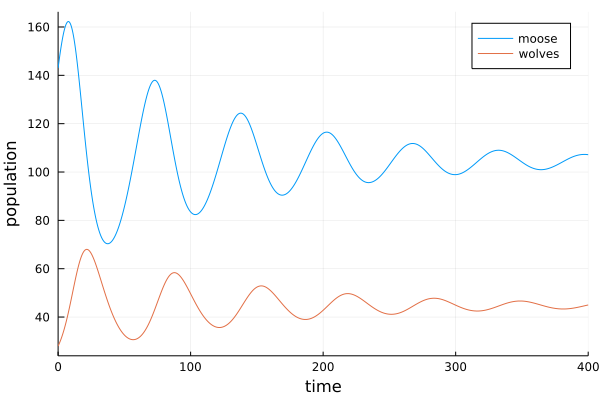

In [ ]:
params = (0.1, 0.002, 0.001, 0.1, 0.0001, 0.0001)    #Przykładowe parametry symulacji (na razie dowolne mające sens)

function lv_up_1(moose, wolves, t, params)
u0 = [moose; wolves]    #Warunki początkowe
tspan = (0, t)     #Przedział czasu (na razie dowolny)
prob = ODEProblem(choose_lv_up_1(params), u0, tspan)     #Przypisanie układu do zmiennej
sol = solve(prob)     #Rowzwiązanie układu
end
plot(lv_up_1(143, 28, 400, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

Okazuje się, że efektem tego modelu jest tłumienie oscylacji z czasem, które wydaje się nie znajdować zastosowania w naszym przypadku.

## Weryfikacja modelu konkurencji

W poprzedniej prezentacji wprowadziliśmy również model konkurencji, który wyraża się wzorami <br> <br>
$$\frac{dx}{dt} = (a - by)x - ex,$$\
$$\frac{dy}{dt} = (cx - d)y - fy,$$ <br>
gdzie $e$ i $f$ są współczynnikami konkurencji u wilków i łosi.

In [ ]:
function choose_lv_up_2(params)     #Funkcja zwracająca funkcje, dla uproszczenia podawnia parametrów a, b, c i d.
    return function LotVol!(du, u, p, t)     #
        du[1] = u[1]*(params[1] - params[2]*u[2]) - u[1]*params[5]
        du[2] = u[2]*(params[3]*u[1] - params[4]) - u[2]*params[6]
    end
end

choose_lv_up_2 (generic function with 1 method)

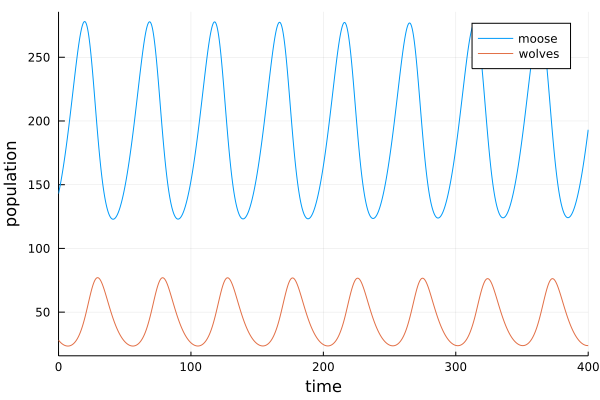

In [ ]:
params = (0.1, 0.002, 0.001, 0.1, 0.01, 0.09)    #Przykładowe parametry symulacji (na razie dowolne mające sens)

function lv_up_2(moose, wolves, t, params)
u0 = [moose; wolves]    #Warunki początkowe
tspan = (0, t)     #Przedział czasu (na razie dowolny)
prob = ODEProblem(choose_lv_up_2(params), u0, tspan)     #Przypisanie układu do zmiennej
sol = solve(prob)     #Rowzwiązanie układu
end
plot(lv_up_2(143, 28, 400, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

Dodane parametry w tym modelu pozwalają wygodnie manipulować amplitudą. Ciężko tu jednak dopatrzyć się interpretacji w konkurencji.

## Własny pomysł na ograniczenie środowiska

Ograniczenie środowiska przyjeliśmy jako następującą zależność. Musimy dodać stałą $L$, której nasza populacja łosi nie przekroczy nawet wtedy, kiedy wilków nie będzie. Dlatego zdecydowaliśmy się przemnożyć nasz model przez $\left(\frac{x}{L}-1\right)$. Wyrażenie to jest równe 0 gdy populacja osiągnie liczebność $L$, będzie dodatnie gdy $L$ zostanie przekroczony i ujemne gdy populacja będzie mniejsza od $L$. Intuicyjnie powinno być na odwrót ale pamiętajmy, że gdy łosi jest dużo to ich populacja już maleje, więc nie chcemy w tym przypadku odwracać pochodnej.<br><br>
$$\frac{dx}{dt} = \left(\frac{x}{L}-1\right)(a - by)x,$$\
$$\frac{dy}{dt} = (cx - d)y.$$

In [ ]:
function choose_lv_up_3(params)     #Funkcja zwracająca funkcje, dla uproszczenia podawnia parametrów a, b, c i d.
    return function LotVol!(du, u, p, t)     #
        du[1] = (u[1]/params[5]-1)*u[1]*(params[1] - params[2]*u[2])
        du[2] = u[2]*(params[3]*u[1] - params[4])
    end
end

choose_lv_up_3 (generic function with 1 method)

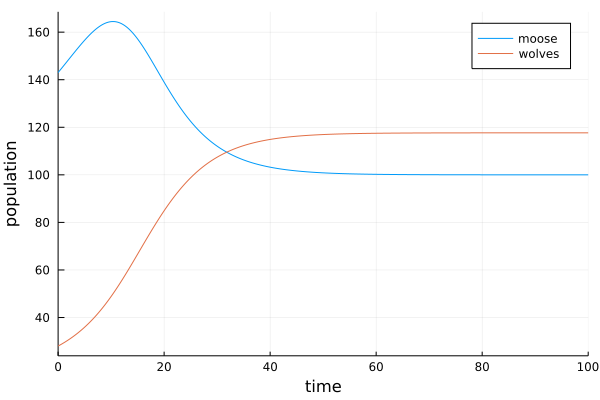

In [ ]:
params = (0.1, 0.002, 0.001, 0.1, 100)    #Przykładowe parametry symulacji (na razie dowolne mające sens)

function lv_up_3(moose, wolves, t, params)
u0 = [moose; wolves]    #Warunki początkowe
tspan = (0, t)     #Przedział czasu (na razie dowolny)
prob = ODEProblem(choose_lv_up_3(params), u0, tspan)     #Przypisanie układu do zmiennej
sol = solve(prob)     #Rowzwiązanie układu
end
plot(lv_up_3(143, 28, 100, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

Niestety jak widać wizualizacja tego przypadku kończy się wytłumnieniem.

## Ograniczenie środowiska ze źródeł

Zasięgnęliśy do źródeł zewnętrznych i odszukaliśmy wzór postaci <br> <br>
$$ \left\{\begin{array}{ccl}\displaystyle{\frac{dx}{dt}} & = & x\left(r\left(1-\frac{x}{L}\right) - \frac{ky}{x+D}\right) \\
 \displaystyle{\frac{dy}{dt}} & = & ys\left(1-\frac{hy}{x}\right)\end{array}\right., $$ <br>
gdzie $K$ jest górnym ograniczeniem środowiska, a $r, h, s, k, K, D$ to nieujemne stałe zależne od modelu.

In [ ]:
function choose_lv_up_4(params)     #Funkcja zwracająca funkcje, dla uproszczenia podawnia parametrów a, b, c i d.
    return function LotVol!(du, u, p, t)     #
        du[1] = u[1]*(params[1]*(1-u[1]/params[4]) - params[4]*u[2]/(u[1]+params[6]))
        du[2] = u[2]*params[3]*(1-params[2]/u[1])
    end
end

choose_lv_up_4 (generic function with 1 method)

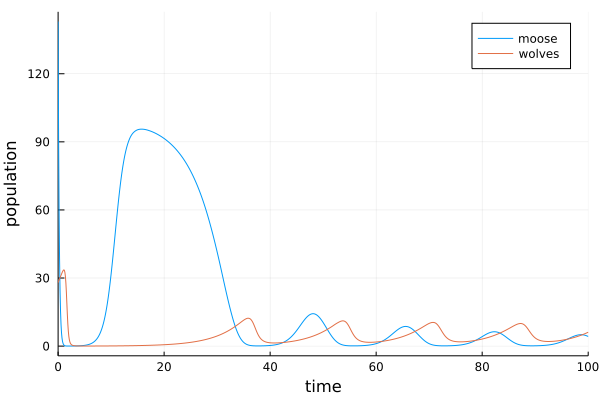

In [ ]:
params = (1, 0.5, 0.2, 100, 1000, 500)    #Przykładowe parametry symulacji (na razie dowolne mające sens)

function lv_up_4(moose, wolves, t, params)
u0 = [moose; wolves]    #Warunki początkowe
tspan = (0, t)     #Przedział czasu (na razie dowolny)
prob = ODEProblem(choose_lv_up_4(params), u0, tspan)     #Przypisanie układu do zmiennej
sol = solve(prob)     #Rowzwiązanie układu
end
plot(lv_up_4(143, 28, 100, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

# Dodanie czynników losowych

W bibliotece Differential Equations jest także moduł uwzględniający losowe zachowanie populacji. Oto kilka wywołań eksperymentalnego układu, którego wartości są modyfikowane przez proces Wienera (ruch Browna).<br><br>
$$ \left\{\begin{array}{ccl}\displaystyle{\frac{dx}{dt}} & = & x\left(r\left(1-\frac{x}{L}\right) - \frac{ky}{x+D}\right) + \frac{W_{1}(t)}{500} \\
 \displaystyle{\frac{dy}{dt}} & = & ys\left(1-\frac{hy}{x}\right)+\frac{W_{2}(t)}{500}\end{array}\right.. $$ <br>

In [ ]:
function choose_lv_up_4(params)     #Funkcja zwracająca funkcje, dla uproszczenia podawnia parametrów a, b, c i d.
    return function LotVol!(du, u, p, t, W)
        du[1] = u[1]*(params[1]*(1-u[1]/params[4]) - params[4]*u[2]/(u[1]+params[6])) + W[1]/500
        du[2] = u[2]*params[3]*(1-params[2]/u[1]) + W[2]/500
    end
end

choose_lv_up_4 (generic function with 1 method)

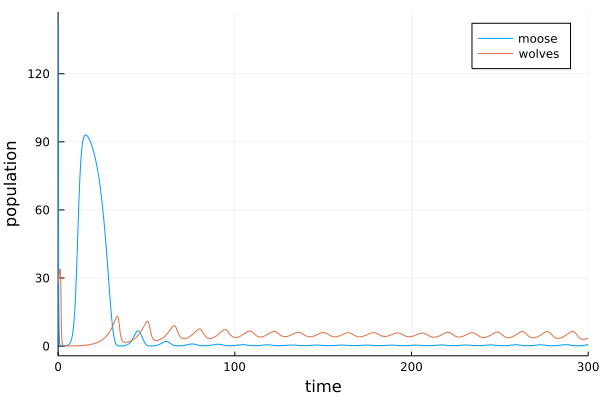

In [ ]:
params = (1, 0.3, 0.2, 100, 1000, 500)    #Przykładowe parametry symulacji (na razie dowolne mające sens)

function lv_up_4(moose, wolves, t, params)
u0 = [moose; wolves]    #Warunki początkowe
tspan = (0, t)     #Przedział czasu (na razie dowolny)
prob = RODEProblem(choose_lv_up_4(params), u0, tspan)    #Przypisanie układu do zmiennej
sol = solve(prob, RandomEM(), dt=1/100)     #Rowzwiązanie układu
end
plot(lv_up_4(143, 28, 300, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

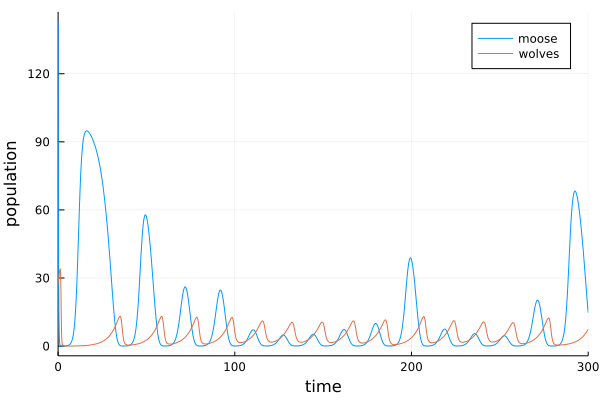

In [ ]:
plot(lv_up_4(143, 28, 300, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

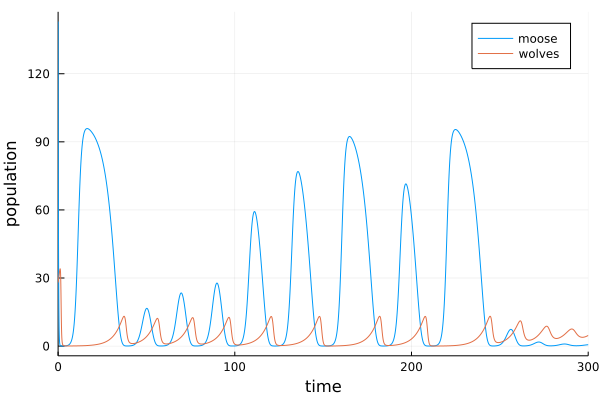

In [ ]:
plot(lv_up_4(143, 28, 300, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

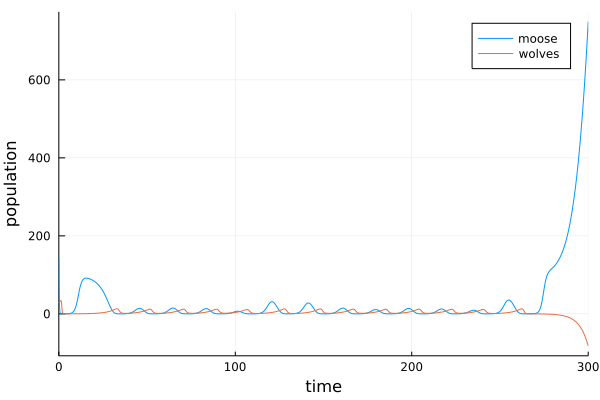

In [ ]:
plot(lv_up_4(143, 28, 300, params),
     xlabel = "time",
     ylabel = "population",
     label = ["moose" "wolves"])

Model ten ma tendencję do psucia się. Wiele wywołań kończy się szybką destabilizacją. Niektóre kończą się też wytłumeniem populacji łosi.

# Finalny model dyskretny

Zacznijmy od punktu wyjścia z poprzedniej prezentacji

$$x_{t+1} = (1 + a -by_t)x_t,$$
$$y_{t+1} = (1 + cx_t- d)y_t,$$
gdzie<br>
$a$ to częstość narodzin ofiar, <br>
$b$ to częstość umierania ofiar na skutek drapieżnictwa, <br>
$c$ to częśtość narodzin drapieżników, <br>
$d$ to częstość umierania drapieżników.

Niestety nie byliśmy w stanie otrzymać nawet trochę stabilnego modelu, w którym proporcja łosie/wilki byłaby bliższa rzeczywistej.

In [ ]:
function d_LotVol(moose, wolves, t, a, b, c, d)

    T = 1:t
    arr_moose  = Array{BigFloat}(undef, t+1)
    arr_wolves = Array{BigFloat}(undef, t+1)
    arr_moose[1]  = moose
    arr_wolves[1] = wolves

    for time_unit in T
        arr_moose[time_unit+1] = (1 + a - b*arr_wolves[time_unit])arr_moose[time_unit]
        arr_wolves[time_unit+1] = (1 + c*arr_moose[time_unit] - d)arr_wolves[time_unit]
    end
    
    return arr_moose, arr_wolves
end

d_LotVol (generic function with 1 method)

In [ ]:
function plot_pop(pop)
    
    MW = [pop[1] pop[2]]
    T = 1:length(MW[:,1])
    plot(T, MW,
         xlabel = "time",
         ylabel = "population",
         label = ["moose" "wolves"],
         ylims=(0,200))
end

plot_pop (generic function with 1 method)

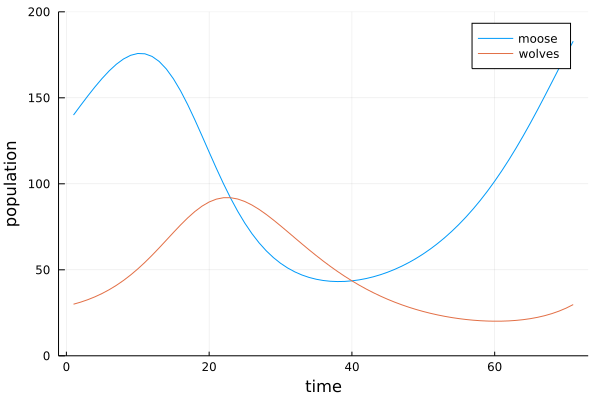

In [ ]:
plot_pop(d_LotVol(140, 30, 70, 0.1, 0.002, 0.001, 0.1))

### Wpływ choroby łosi
Dodajemy do modelu szansę na śmierć dwóch lub trzech łosi w jednostce czasu.

In [ ]:
function d_LotVol_ill(moose, wolves, t, a, b, c, d)

    T = 1:t
    arr_moose  = Array{BigFloat}(undef, t+1)
    arr_wolves = Array{BigFloat}(undef, t+1)
    arr_moose[1]  = moose
    arr_wolves[1] = wolves

    for time_unit in T
        arr_moose[time_unit+1] = (1 + a - b*arr_wolves[time_unit])arr_moose[time_unit]
        arr_wolves[time_unit+1] = (1 + c*arr_moose[time_unit] - d)arr_wolves[time_unit]
        # ----------------------NEW--------------------------
        U = rand()
        if U < 0.3
            arr_moose[time_unit+1] -= 2
        elseif U < 0.4
            arr_moose[time_unit+1] -= 4
        end
        # ---------------------------------------------------
    end
    
    return arr_moose, arr_wolves
end

d_LotVol_ill (generic function with 1 method)

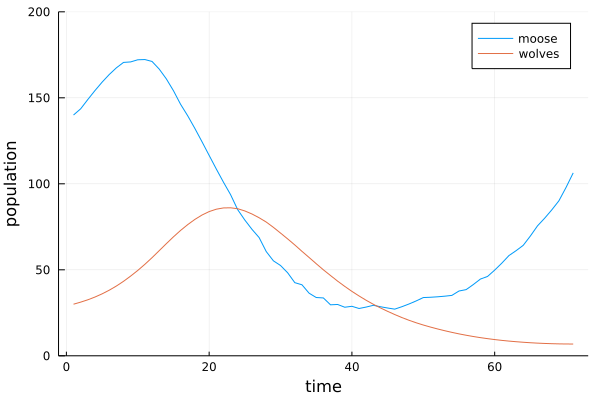

In [ ]:
plot_pop(d_LotVol_ill(140, 30, 70, 0.1, 0.002, 0.001, 0.1))

### Wpływ lodowego mostu
Kiedyś prawie każdej zimy jezioro zamarzało i pozwalało wilkom z zewnątrz dołączyć do tych na wyspie. Jednak, w wyniku podwyższenia się średniej temperatury zimą w ostatnich latach, wilki nie mogą już przedostać się na wyspę. Skutkuje to istotnym zmniejszeniem ich populacji i groźbą wymarcia.

In [ ]:
function d_LotVol_ib(moose, wolves, t, a, b, c, d)

    T = 1:t
    arr_moose  = Array{BigFloat}(undef, t+1)
    arr_wolves = Array{BigFloat}(undef, t+1)
    arr_moose[1]  = moose
    arr_wolves[1] = wolves

    for time_unit in T
        arr_moose[time_unit+1] = (1 + a - b*arr_wolves[time_unit])arr_moose[time_unit]
        arr_wolves[time_unit+1] = (1 + c*arr_moose[time_unit] - d)arr_wolves[time_unit]
        
        U = rand()
        if U < 0.3
            arr_moose[time_unit+1] -= 2
        elseif U < 0.4
            arr_moose[time_unit+1] -= 4
        end
        # ----------------------NEW--------------------------
        if time_unit < 50
            if time_unit % 3 == 0
                arr_wolves[time_unit+1] += 5
            end
        end
        # ---------------------------------------------------
    end
    
    return arr_moose, arr_wolves
end

d_LotVol_ib (generic function with 1 method)

### Porównanie naszego modelu z prawdziwymi danymi. 

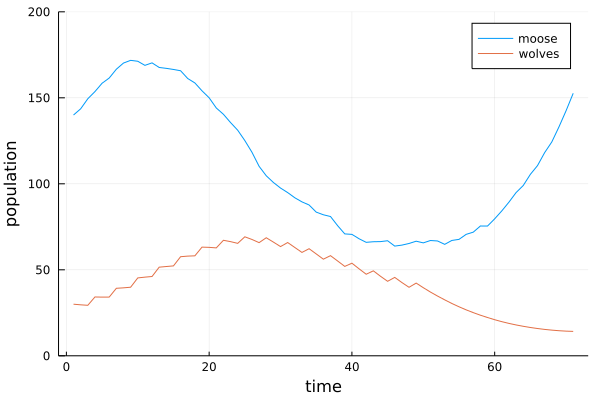

In [ ]:
plot_pop(d_LotVol_ib(140, 30, 70, 0.1, 0.002, 0.0007, 0.11))

<img src="https://www.nps.gov/isro/learn/nature/images/Wolf-Moose_Population_2019.jpg?maxwidth=1200&maxheight=1200&autorotate=false"><br>
wykres ze strony https://www.nps.gov/isro/learn/nature/wolf-moose-populations.htm

---

# Podsumowanie projektu

- przeszukaliśmy sporą część internetu,
- przekonaliśmy się o trudnościach z destabilizacją w modelowaniu dyskretnym,
- poznaliśmy trudności modelowania ciągłego,
- finalnie otrzymaliśmy zbliżony model do rzeczywistej sytuacji na wyspie.

### Źródła
- "The Wolves of Isle Royale" by L. David Mech, PhD,
- "The moose of Isle Royale" by Adolph Murie
- https://www.nps.gov/isro/learn/nature/wolf-moose-populations.htm
- https://deepblue.lib.umich.edu/bitstream/handle/2027.42/56270/MP025.pdf
- https://meridian.allenpress.com/jwd/article/24/3/461/120010/INCREASED-OSTEOARTHRITIS-IN-MOOSE-FROM-ISLE-ROYALE
- https://pl.wikiqube.net/wiki/Wolves_and_moose_on_Isle_Royale
- https://pl.wikipedia.org/wiki/R%C3%B3wnanie_Lotki-Volterry